# Naming colors

If you are shown random colors evenly spaced across the color spectrum, what percentage of those colors would the average person name red? What about green? 

English speakers in the United States were shown 80 color chips in random order in controlled lighting condtions. These 80 colors are evenly spaced across the standard Munsell array of colors. The participants were told: "There are 11 choices: black, white, red, green, blue, purple, brown, yellow, orange, pink, gray. Choose the closest color word".

This study was then repeated with Bolivian-Spanish speakers in Bolivia and Tsimane' speakers from the Amazon.

The dataset `munsell-array-fixed-choice.csv` shows the most common name in each language for each color chip.

In [2]:
# FOR GOOGLE COLAB ONLY.
# Uncomment and run the code below. A dialog will appear to upload files.
# Upload 'munsell-array-fixed-choice.csv'.

# from google.colab import files
# uploaded = files.upload()

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("munsell-array-fixed-choice.csv")
df.head()

,grid,x,y,munsell_code,tile_hex,english_color,spanish_color,tsimane_color,spanish,tsimane
0,B1,1,7,5R8/6,#fbb6b0,pink,pink,yellow,rosada (pink),chamus (yellow)
1,D1,1,5,5R6/12,#eb6a68,pink,pink,red,rosada (pink),jainas (red)
2,F1,1,3,5R4/14,#bb1933,red,red,red,rojo (red),jainas (red)
3,H1,1,1,5R2/8,#610d25,red,red,brown,rojo (red),cafedyeisi (brown)
4,A2,2,8,10R9/2,#f2ded8,pink,white,white,blanco (white),jaibas (white)


The function below plots the 80 evenly spaced colors that each study participant was shown in random order.

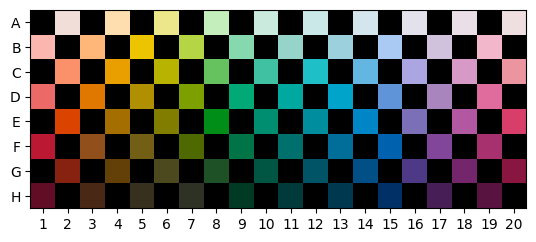

In [4]:
def plot_colors(color_column):
    fig, ax = plt.subplots()
    for idx, row in df.iterrows():
        ax.add_patch(plt.Rectangle((row['x'] - 0.5, row['y'] - 0.5), 1, 1, color=row[color_column], linewidth=0))

    ax.set_xlim(0.5, 20.5)
    ax.set_ylim(0.5, 8.5)
    ax.set_aspect('equal')
    ax.set_facecolor('black')
    ax.set_xticks(range(1, 21))
    ax.set_yticks(range(1, 9), ['H', 'G', 'F', 'E', 'D', 'C', 'B', 'A'])

plot_colors('tile_hex')

We can also use this function to plot the most common name in each language for each color chip.

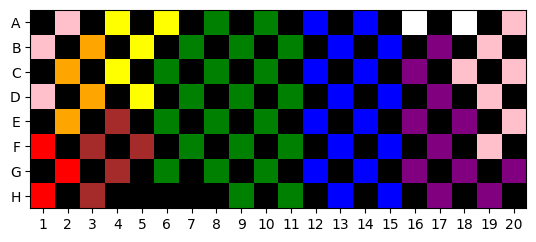

In [5]:
# Also try 'spanish_color' and 'tsimane_color'
plot_colors('english_color')

### Project Ideas:

- For each language, calculate what percentage of chips are named each color. Return dataframes for each language.

- Create a horizontal bar plot for each language. Each bar represents a color name and the length encodes the percentage of chips that are named that color.

- Is there a correlation between languages? Create scatter plots. 
	- Hint: the x-axis could be the percentage of chips for English speakers and the y-axis could be the percentage of chips for Tsimane speakers and each data point represents a color name.
	
	- You might need to `merge` dataframes.


In [6]:
# Project Idea 1: Calculate percentage of chips named each color for each language
print("=== Color Naming Percentages by Language ===")
print()

# Calculate percentages for each language
english_percentages = df['english_color'].value_counts(normalize=True) * 100
spanish_percentages = df['spanish_color'].value_counts(normalize=True) * 100
tsimane_percentages = df['tsimane_color'].value_counts(normalize=True) * 100

# Create dataframes for each language
english_df = english_percentages.reset_index()
english_df.columns = ['color', 'percentage']
english_df['language'] = 'English'

spanish_df = spanish_percentages.reset_index()
spanish_df.columns = ['color', 'percentage']
spanish_df['language'] = 'Spanish'

tsimane_df = tsimane_percentages.reset_index()
tsimane_df.columns = ['color', 'percentage']
tsimane_df['language'] = 'Tsimane'

print("ENGLISH COLOR PERCENTAGES:")
print(english_df.sort_values('percentage', ascending=False))
print()

print("SPANISH COLOR PERCENTAGES:")
print(spanish_df.sort_values('percentage', ascending=False))
print()

print("TSIMANE COLOR PERCENTAGES:")
print(tsimane_df.sort_values('percentage', ascending=False))
print()

=== Color Naming Percentages by Language ===

ENGLISH COLOR PERCENTAGES:
    color  percentage language
0   green       27.50  English
1    blue       20.00  English
2  purple       13.75  English
3    pink       12.50  English
4   brown        6.25  English
5  yellow        6.25  English
6  orange        5.00  English
7     red        3.75  English
8   black        2.50  English
9   white        2.50  English

SPANISH COLOR PERCENTAGES:
        color  percentage language
0       green       27.50  Spanish
1   lightblue       13.75  Spanish
2      purple       13.75  Spanish
3        pink       10.00  Spanish
4       white        7.50  Spanish
5         red        5.00  Spanish
6      orange        5.00  Spanish
7       brown        5.00  Spanish
8      yellow        5.00  Spanish
9        blue        5.00  Spanish
10      black        2.50  Spanish

TSIMANE COLOR PERCENTAGES:
    color  percentage language
0   green       25.00  Tsimane
1    blue       15.00  Tsimane
2  yellow       1

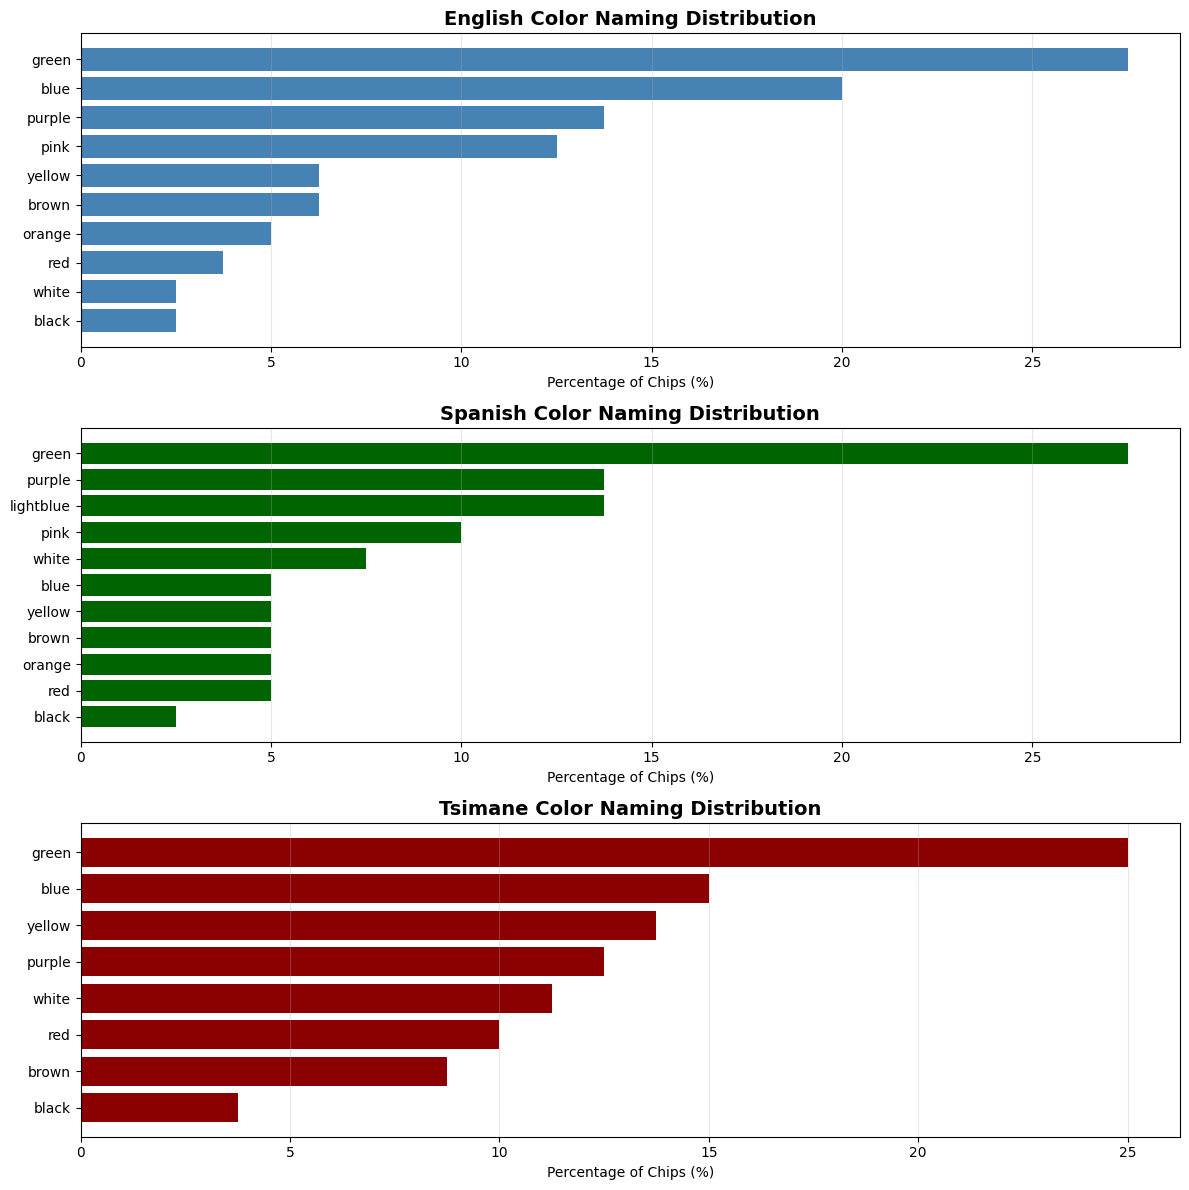

=== SUMMARY STATISTICS ===
English: Most common color is 'green' (27.5%)
Spanish: Most common color is 'green' (27.5%)
Tsimane: Most common color is 'green' (25.0%)

Number of different colors used:
English: 10 colors
Spanish: 11 colors
Tsimane: 8 colors


In [10]:
# Project Idea 2: Create horizontal bar plots for each language
fig, axes = plt.subplots(3, 1, figsize=(12, 12))

# English bar plot
english_sorted = english_df.sort_values('percentage', ascending=True)
axes[0].barh(english_sorted['color'], english_sorted['percentage'], color='steelblue')
axes[0].set_title('English Color Naming Distribution', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Percentage of Chips (%)')
axes[0].grid(axis='x', alpha=0.3)

# Spanish bar plot
spanish_sorted = spanish_df.sort_values('percentage', ascending=True)
axes[1].barh(spanish_sorted['color'], spanish_sorted['percentage'], color='darkgreen')
axes[1].set_title('Spanish Color Naming Distribution', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Percentage of Chips (%)')
axes[1].grid(axis='x', alpha=0.3)

# Tsimane bar plot
tsimane_sorted = tsimane_df.sort_values('percentage', ascending=True)
axes[2].barh(tsimane_sorted['color'], tsimane_sorted['percentage'], color='darkred')
axes[2].set_title('Tsimane Color Naming Distribution', fontsize=14, fontweight='bold')
axes[2].set_xlabel('Percentage of Chips (%)')
axes[2].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

# Summary statistics
print("=== SUMMARY STATISTICS ===")
print(f"English: Most common color is '{english_sorted.iloc[-1]['color']}' ({english_sorted.iloc[-1]['percentage']:.1f}%)")
print(f"Spanish: Most common color is '{spanish_sorted.iloc[-1]['color']}' ({spanish_sorted.iloc[-1]['percentage']:.1f}%)")
print(f"Tsimane: Most common color is '{tsimane_sorted.iloc[-1]['color']}' ({tsimane_sorted.iloc[-1]['percentage']:.1f}%)")
print()
print(f"Number of different colors used:")
print(f"English: {len(english_df)} colors")
print(f"Spanish: {len(spanish_df)} colors")
print(f"Tsimane: {len(tsimane_df)} colors")

=== Language Correlation Analysis ===

Language comparison dataframe:
        color  english_pct  spanish_pct  tsimane_pct
5       green        27.50        27.50        25.00
10       blue        20.00         5.00        15.00
7      purple        13.75        13.75        12.50
9        pink        12.50        10.00         0.00
0       brown         6.25         5.00         8.75
4      yellow         6.25         5.00        13.75
8      orange         5.00         5.00         0.00
1         red         3.75         5.00        10.00
2       black         2.50         2.50         3.75
3       white         2.50         7.50        11.25
6   lightblue         0.00        13.75         0.00



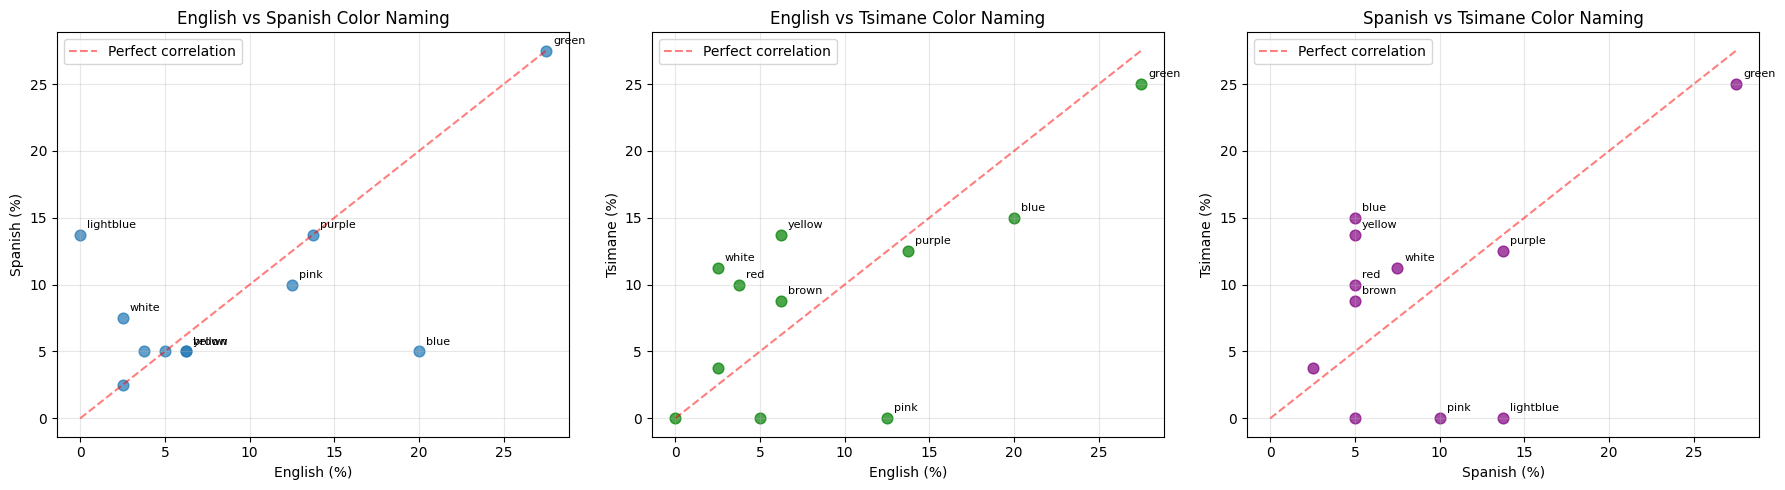

In [11]:
# Project Idea 3: Correlation analysis between languages with scatter plots
print("=== Language Correlation Analysis ===")
print()

# Merge dataframes to compare languages
# First, let's create a comprehensive dataframe with all colors from all languages
all_colors = set(english_df['color'].tolist() + spanish_df['color'].tolist() + tsimane_df['color'].tolist())

# Create a complete dataframe with all colors for each language (filling 0 for missing colors)
comparison_data = []
for color in all_colors:
    english_pct = english_df[english_df['color'] == color]['percentage'].values
    spanish_pct = spanish_df[spanish_df['color'] == color]['percentage'].values
    tsimane_pct = tsimane_df[tsimane_df['color'] == color]['percentage'].values
    
    comparison_data.append({
        'color': color,
        'english_pct': english_pct[0] if len(english_pct) > 0 else 0,
        'spanish_pct': spanish_pct[0] if len(spanish_pct) > 0 else 0,
        'tsimane_pct': tsimane_pct[0] if len(tsimane_pct) > 0 else 0
    })

comparison_df = pd.DataFrame(comparison_data)
print("Language comparison dataframe:")
print(comparison_df.sort_values('english_pct', ascending=False))
print()

# Create scatter plots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# English vs Spanish
axes[0].scatter(comparison_df['english_pct'], comparison_df['spanish_pct'], alpha=0.7, s=60)
for i, row in comparison_df.iterrows():
    if row['english_pct'] > 5 or row['spanish_pct'] > 5:  # Label significant points
        axes[0].annotate(row['color'], (row['english_pct'], row['spanish_pct']), 
                        xytext=(5, 5), textcoords='offset points', fontsize=8)
axes[0].set_xlabel('English (%)')
axes[0].set_ylabel('Spanish (%)')
axes[0].set_title('English vs Spanish Color Naming')
axes[0].grid(True, alpha=0.3)
axes[0].plot([0, max(comparison_df['english_pct'])], [0, max(comparison_df['english_pct'])], 
             'r--', alpha=0.5, label='Perfect correlation')
axes[0].legend()

# English vs Tsimane
axes[1].scatter(comparison_df['english_pct'], comparison_df['tsimane_pct'], alpha=0.7, s=60, color='green')
for i, row in comparison_df.iterrows():
    if row['english_pct'] > 5 or row['tsimane_pct'] > 5:
        axes[1].annotate(row['color'], (row['english_pct'], row['tsimane_pct']), 
                        xytext=(5, 5), textcoords='offset points', fontsize=8)
axes[1].set_xlabel('English (%)')
axes[1].set_ylabel('Tsimane (%)')
axes[1].set_title('English vs Tsimane Color Naming')
axes[1].grid(True, alpha=0.3)
axes[1].plot([0, max(comparison_df['english_pct'])], [0, max(comparison_df['english_pct'])], 
             'r--', alpha=0.5, label='Perfect correlation')
axes[1].legend()

# Spanish vs Tsimane
axes[2].scatter(comparison_df['spanish_pct'], comparison_df['tsimane_pct'], alpha=0.7, s=60, color='purple')
for i, row in comparison_df.iterrows():
    if row['spanish_pct'] > 5 or row['tsimane_pct'] > 5:
        axes[2].annotate(row['color'], (row['spanish_pct'], row['tsimane_pct']), 
                        xytext=(5, 5), textcoords='offset points', fontsize=8)
axes[2].set_xlabel('Spanish (%)')
axes[2].set_ylabel('Tsimane (%)')
axes[2].set_title('Spanish vs Tsimane Color Naming')
axes[2].grid(True, alpha=0.3)
axes[2].plot([0, max(comparison_df['spanish_pct'])], [0, max(comparison_df['spanish_pct'])], 
             'r--', alpha=0.5, label='Perfect correlation')
axes[2].legend()

plt.tight_layout()
plt.show()

In [12]:
# Calculate correlation coefficients
import numpy as np
from scipy.stats import pearsonr

print("=== CORRELATION ANALYSIS ===")
print()

# Calculate correlations
corr_eng_spa, p_eng_spa = pearsonr(comparison_df['english_pct'], comparison_df['spanish_pct'])
corr_eng_tsi, p_eng_tsi = pearsonr(comparison_df['english_pct'], comparison_df['tsimane_pct'])
corr_spa_tsi, p_spa_tsi = pearsonr(comparison_df['spanish_pct'], comparison_df['tsimane_pct'])

print(f"English vs Spanish correlation: {corr_eng_spa:.3f} (p-value: {p_eng_spa:.3f})")
print(f"English vs Tsimane correlation: {corr_eng_tsi:.3f} (p-value: {p_eng_tsi:.3f})")
print(f"Spanish vs Tsimane correlation: {corr_spa_tsi:.3f} (p-value: {p_spa_tsi:.3f})")
print()

# Identify colors with biggest differences
print("=== BIGGEST DIFFERENCES BETWEEN LANGUAGES ===")
print()

# Colors where English and Tsimane differ most
comparison_df['eng_tsi_diff'] = abs(comparison_df['english_pct'] - comparison_df['tsimane_pct'])
comparison_df['eng_spa_diff'] = abs(comparison_df['english_pct'] - comparison_df['spanish_pct'])
comparison_df['spa_tsi_diff'] = abs(comparison_df['spanish_pct'] - comparison_df['tsimane_pct'])

print("Biggest English vs Tsimane differences:")
eng_tsi_diffs = comparison_df.nlargest(5, 'eng_tsi_diff')[['color', 'english_pct', 'tsimane_pct', 'eng_tsi_diff']]
print(eng_tsi_diffs)
print()

print("Biggest English vs Spanish differences:")
eng_spa_diffs = comparison_df.nlargest(5, 'eng_spa_diff')[['color', 'english_pct', 'spanish_pct', 'eng_spa_diff']]
print(eng_spa_diffs)
print()

# Colors that are common across all languages
print("=== COLORS COMMON ACROSS ALL LANGUAGES ===")
common_colors = comparison_df[(comparison_df['english_pct'] > 0) & 
                             (comparison_df['spanish_pct'] > 0) & 
                             (comparison_df['tsimane_pct'] > 0)]
print(f"Colors used by all three languages: {len(common_colors)}")
print(common_colors[['color', 'english_pct', 'spanish_pct', 'tsimane_pct']].sort_values('english_pct', ascending=False))
print()

# Colors unique to each language
print("=== LANGUAGE-SPECIFIC COLORS ===")
english_only = comparison_df[(comparison_df['english_pct'] > 0) & 
                            (comparison_df['spanish_pct'] == 0) & 
                            (comparison_df['tsimane_pct'] == 0)]
spanish_only = comparison_df[(comparison_df['english_pct'] == 0) & 
                            (comparison_df['spanish_pct'] > 0) & 
                            (comparison_df['tsimane_pct'] == 0)]
tsimane_only = comparison_df[(comparison_df['english_pct'] == 0) & 
                            (comparison_df['spanish_pct'] == 0) & 
                            (comparison_df['tsimane_pct'] > 0)]

print(f"Colors used only by English speakers: {english_only['color'].tolist()}")
print(f"Colors used only by Spanish speakers: {spanish_only['color'].tolist()}")
print(f"Colors used only by Tsimane speakers: {tsimane_only['color'].tolist()}")

ModuleNotFoundError: No module named 'scipy'